E-commerce is a huge business sector that allows customers to access a variety of goods and services with a few clicks. Many popular shopping platforms such as Amazon or Alibaba process millions of transactions annually. In recent years, due to the corona disease, online shopping has increased dramatically, therefore, the online shopping market has become very competitive and it is important for strong and innovative online shopping platforms.   
One possible way to increase online shopping transactions is to understand and respond to customers' behavior. According to sufficient online shopping data and machine learning techniques, it is possible to determine the purchase intention of website visitors, so in this exercise, we want to use machine learning algorithms in Marketing Analytics, which is one of the topics discussed in recent years. let's get to know each other more.

## Dataset

Before doing anything, we need to get familiar with Dataset. The desired dataset is located in the `customers_intention.csv` file. This dataset contains various information related to customer behavior on online shopping websites, which helps us to perform marketing analysis and understand related KPIs and metrics. This dataset contains feature vectors belonging to 12330 sessions, in the sense that each row shows the behavior of a customer to buy a product and has a total of 10 numerical features and 8 categorical features.
Use the "Revenue" property as the class label.

in this section, what you have to do is as follows:
 - lead the dataset
 - print information of the dataset
 - plot number of data for each label in `Revenue` column.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("Customers_intention.csv")


In [3]:
# dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

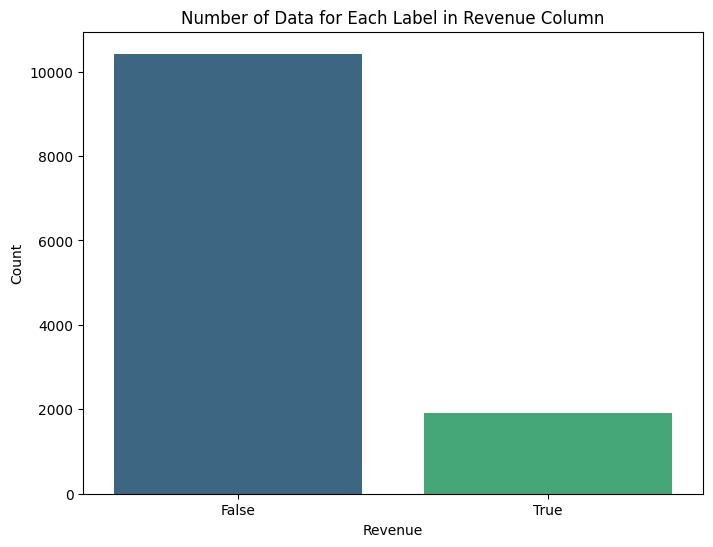

In [4]:
# plot number of data for each class label
plt.figure(figsize=(8, 6))
sns.countplot(x='Revenue', hue="Revenue", data=df, palette='viridis', legend=False)
plt.title('Number of Data for Each Label in Revenue Column')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

## Data Cleaning

Now, after reading the data, it is time to clean the data. At this stage, we need to do the necessary pre-processing to clean the dataset. Some of the things we suggest you do are as follows:
- Identification of null values
- Handling the null values of each column in an appropriate way
- one-hot encoding of categorical columns. you can use this [link](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) for one-hot encoding
And any pre-processing you want.

In [5]:
# identify and handle nan values
print(df.isnull().sum())
# There aren't any null values to handle

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [6]:
# categorical encoding and one hot encoding
categorical_columns = df.select_dtypes(include=["object", "bool"]).columns
df_one_hot = pd.get_dummies(df, columns=categorical_columns, dtype=int)
df_one_hot = df_one_hot.drop(columns=["Weekend_False", "Revenue_False"])
df_one_hot = df_one_hot.rename(columns={"Weekend_True":"Weekend", "Revenue_True":"Revenue"})
print(df_one_hot.info())
print(df["Month"].nunique())
df_one_hot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,1,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,1,0,0,0,0,1,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,1,0,0,0,0,1,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,1,0,0,0,0,1,0,0


## Train/Test Split
- Divide the data into two parts, train and test. Assign `80%` of the data to the train section.
    - split in a `stratified` fashion. (Hint: you need to change a parameter in the corresponding method)

In [7]:
# import train test split from sklearn
from sklearn.model_selection import train_test_split

In [8]:
# train test split
X = df_one_hot.drop(columns=["Revenue"])
y = df_one_hot["Revenue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")
X_train.head()

Training set shape: (9864, 28), (9864,)
Testing set shape: (2466, 28), (2466,)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend
4263,8,732.25,0,0.0,34,1345.755952,0.005128,0.013342,12.274195,0.8,...,0,0,1,0,0,0,0,0,1,0
5905,0,0.00,0,0.0,4,157.200000,0.040000,0.100000,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,1
9434,0,0.00,0,0.0,4,42.000000,0.000000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
3505,2,338.00,0,0.0,17,1205.566667,0.012500,0.037500,19.236250,0.8,...,0,0,1,0,0,0,0,0,1,0
2067,0,0.00,0,0.0,32,827.646212,0.000000,0.000587,54.676348,0.0,...,0,1,0,0,0,0,0,0,1,0


## Classification Using Regression

- Assign +1 to every instance of customer visit that led to a purchase and assign -1 to every visit that did not lead to a purchase.
- Using a regression model (univariate, multivariate, linear, polynomial, etc.), predict whether a cutomer's visit will lead to a purchase or not.
- How do you decide whether a visit will lead to a purchase based on the output of the model which is a real-valued number?

In [9]:
# Assign +1 to every instance of customer visit that led to a purchase and assign -1 to every visit that did not lead to a purchase.
y_train = y_train.apply(lambda x: 1 if x else -1)
y_test = y_test.apply(lambda x: 1 if x else -1)
print(y_train.head())
print(y_test.head())

4263   -1
5905   -1
9434   -1
3505    1
2067    1
Name: Revenue, dtype: int64
4722   -1
6835   -1
5524    1
663    -1
136    -1
Name: Revenue, dtype: int64


In [10]:
# Using a regression model (univariate, multivariate, linear, polynomial, etc.), predict whether a cutomer's visit will lead to a purchase or not.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
# How do you decide whether a visit will lead to a purchase based on the output of the model which is a real-valued number?
# By using threshold
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
# Define a threshold to decide whether a visit will lead to a purchase
threshold = 0
y_pred_binary = np.where(y_pred > threshold, 1, -1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


# Show some predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Predicted_Binary': y_pred_binary})
predictions.head()

Accuracy: 0.8710462287104623
Confusion Matrix:
[[2063   21]
 [ 297   85]]


,Actual,Predicted,Predicted_Binary
4722,-1,-0.968924,-1
6835,-1,-0.858811,-1
5524,1,0.868802,1
663,-1,-1.070874,-1
136,-1,-0.968667,-1


## Dimensionality Reduction
Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension. Working in high-dimensional spaces can be undesirable for many reasons; raw data are often sparse as a consequence of the curse of dimensionality, and analyzing the data is usually computationally intractable (hard to control or deal with).


in this section you ar goinig to:
- plot datapoints in 2 dimensions using PCA
- Choose the best number of dimensions for PCA by plotting [cumulative explained variance ratio](https://medium.com/@megha.natarajan/understanding-cumulative-explained-variance-in-pca-with-python-653e3592a77c#:~:text=The%20Cumulative%20Explained%20Variance%20plot%20is%20a%20graphical%20representation%20that,the%20variance%20in%20the%20data.)
- Apply pca to the dataset with the number of dimensions you obtained in the previous section

*`don't remember you to standardize data before PCA transformation!`*

In [12]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_one_hot.drop(columns=['Revenue'])
y = df_one_hot['Revenue']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

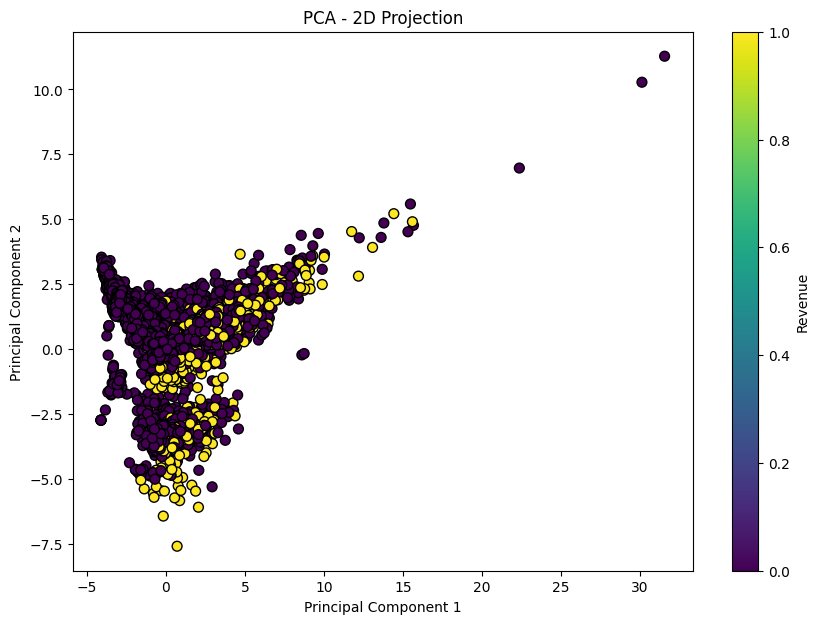

In [13]:
# plot datapoints in 2 dimensions using PCA
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled)

# Plot the 2D PCA result
plt.figure(figsize=(10, 7))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Projection')
plt.colorbar(label='Revenue')
plt.show()

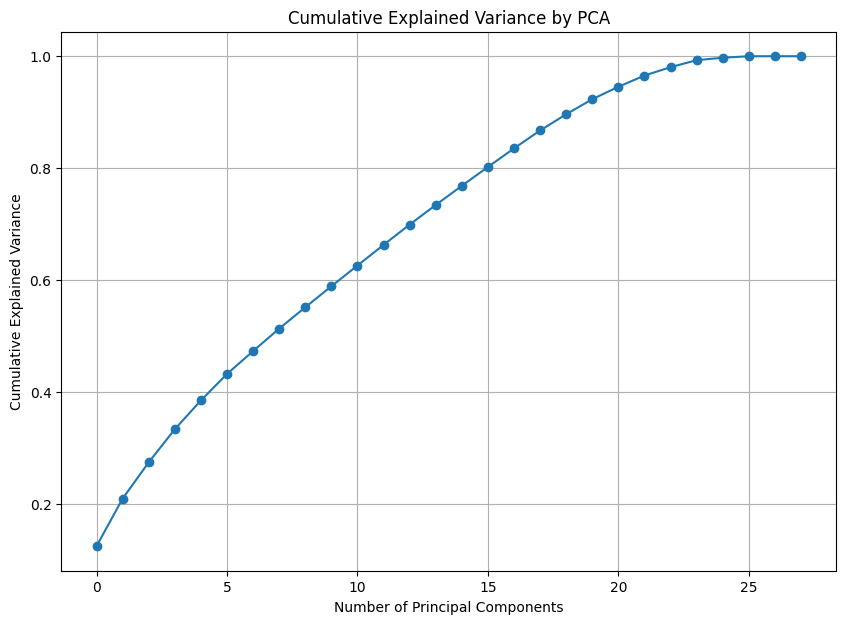

Number of components chosen: 21


In [14]:
# Choose the best number of dimensions for PCA

# Apply PCA to find the cumulative explained variance ratio
pca = PCA()
pca.fit(X_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 7))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA')
plt.grid(True)
plt.show()
n_components = np.argmax(cumulative_variance >= 0.95)
print(f'Number of components chosen: {n_components}')

In [15]:
# Apply pca
pca_21d = PCA(n_components=n_components)
X_pca = pca_21d.fit_transform(X_scaled)

## Over-Sampling

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

in this section you are going to use `SMOTE` method for over-sampling data to get equal number of data for each data. After applying SMOTE plot number of data for each class again to see the diffrence.
- [over-smapling](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

In [16]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: colab 1.13.5 has a non-standard dependency specifier pytz>=2011n. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of colab or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [17]:
# import  imblearn library for SMOTE
from imblearn.over_sampling import SMOTE

In [18]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

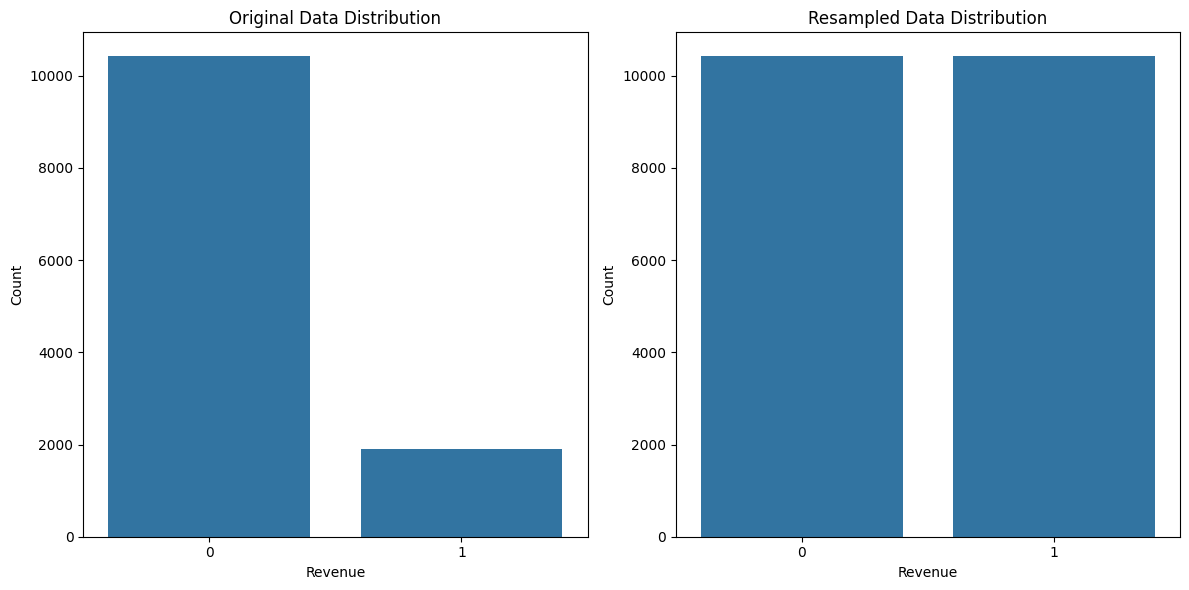

In [19]:
# plot number of data for each class
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original data distribution
sns.countplot(x=y, ax=ax[0])
ax[0].set_title('Original Data Distribution')
ax[0].set_xlabel('Revenue')
ax[0].set_ylabel('Count')

# Resampled data distribution
sns.countplot(x=y_resampled, ax=ax[1])
ax[1].set_title('Resampled Data Distribution')
ax[1].set_xlabel('Revenue')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Training Classifiers

Classification is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

in this section you are going to train several cllassifiers like:
- `SVM`
- `KNN`
- `Logistic Regression`
- `Decision Tree`

Use the dimensionally reduced `train` data to train the specified classifiers.
- for each classifier use `gridsearch` to find best hyper parameters.
    - use `cross validation` for grid search
- after finding best parameters for each classifier, use them to train a classifier with founded parameters.
    - again train your best classifiers with `cross valdiation`
- use a bar plot to show each classifier's `accuracy`, `precision`, `f1` and `roc_auc`.

In [20]:
# Import Necessary libraries
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

In [21]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, train_size=0.8, stratify=y_resampled, random_state=42)

In [22]:
# Train classifiers
classifiers = {
    'SVM': (SVC(), {'kernel': ['linear', 'rbf'], 'C': [1, 10]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [5, 10, 15]}),
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1, 10]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30]})
}

best_models = {}
for name, (clf, params) in classifiers.items():
    print(f"name: {name}, clf, params: {clf, params}")
    grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

scores = {'Classifier': [], 'Accuracy': [], 'Precision': [], 'F1': [], 'ROC AUC': []}

for name, model in best_models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_resampled)
    scores['Classifier'].append(name)
    scores['Accuracy'].append(accuracy_score(y_test_resampled, y_pred))
    scores['Precision'].append(precision_score(y_test_resampled, y_pred))
    scores['F1'].append(f1_score(y_test_resampled, y_pred))
    scores['ROC AUC'].append(roc_auc_score(y_test_resampled, y_pred))

name: SVM, clf, params: (SVC(), {'kernel': ['linear', 'rbf'], 'C': [1, 10]})
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
name: KNN, clf, params: (KNeighborsClassifier(), {'n_neighbors': [5, 10, 15]})
Best parameters for KNN: {'n_neighbors': 5}
name: Logistic Regression, clf, params: (LogisticRegression(), {'C': [0.1, 1, 10]})
Best parameters for Logistic Regression: {'C': 10}
name: Decision Tree, clf, params: (DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30]})
Best parameters for Decision Tree: {'max_depth': 30}


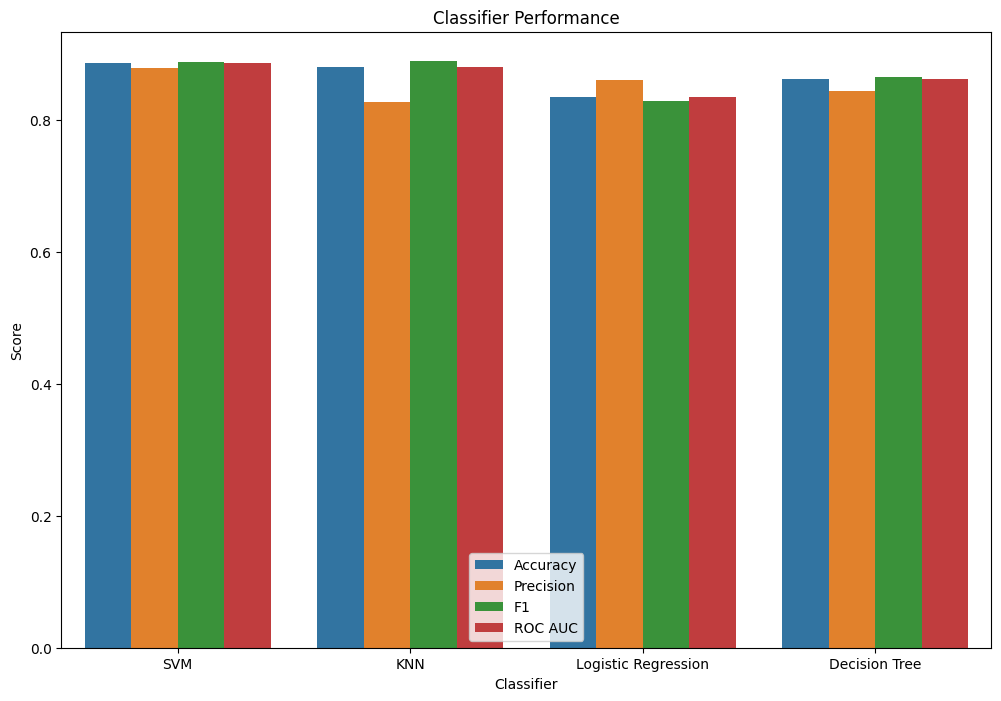

In [23]:
# bar plot for scores
scores_df = pd.DataFrame(scores)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Classifier', y='value', hue='variable', data=pd.melt(scores_df, ['Classifier']))
plt.title('Classifier Performance')
plt.ylabel('Score')
plt.xlabel('Classifier')
plt.legend(loc='best')
plt.show()

## Test your Model and Report results

choose the best model from last section based on the evalutiona metrics and bar plots and after that train the best classifier based on train data and test it's performance on test data. With this, we can see how good the model is on unseen data.

- print `classification report` and plot `confusion matrix` based on your model's predictions and the real labels.

In [24]:
# import necessary Libraries
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, classification_report, confusion_matrix


In [25]:
# train the best model again and evaluate it on test data

# Choose the best model based on the metrics
best_model_name = scores_df.loc[scores_df['F1'].idxmax(), 'Classifier']
best_model = best_models[best_model_name]
print(f"The best model is {best_model_name}")

# Train the best model on the entire training data and evaluate on the test data
best_model.fit(X_train_resampled, y_train_resampled)
y_pred = best_model.predict(X_test_resampled)

The best model is KNN


In [26]:
# classification report
print(classification_report(y_test_resampled, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      2085
           1       0.83      0.96      0.89      2084

    accuracy                           0.88      4169
   macro avg       0.89      0.88      0.88      4169
weighted avg       0.89      0.88      0.88      4169



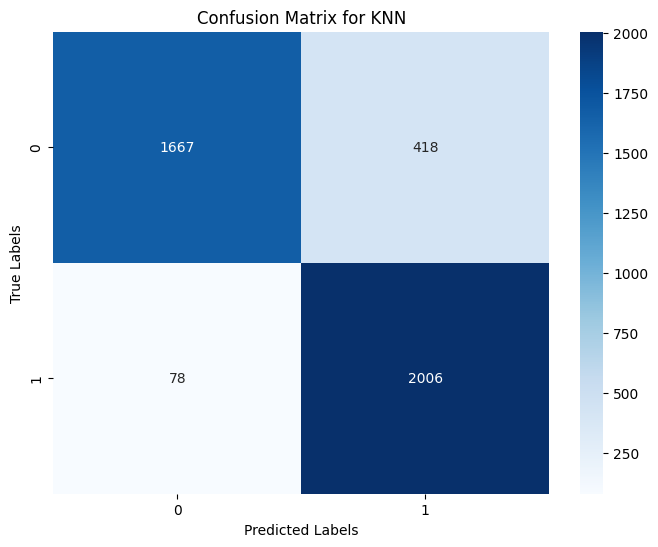

In [27]:
# confusion matrix
conf_matrix = confusion_matrix(y_test_resampled, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Clustering

When analyzing customer behavior, clustering algorithms can help identify groups of customers with similar characteristics. Two popular clustering methods are K-means and DBSCAN.  

In [28]:
#import necessary libraries
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

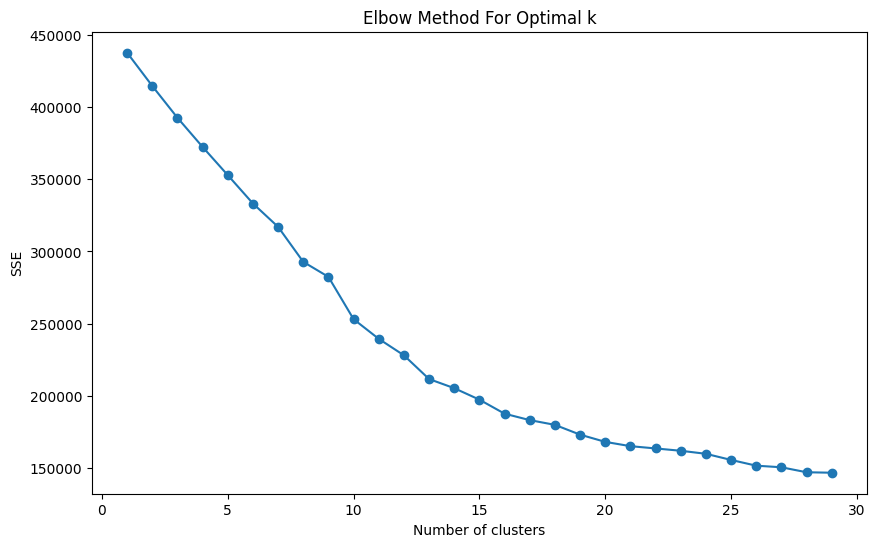

In [29]:
#Kmeans (Use a method for finding optimal number of clusters)
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-means Clustering
# Use the elbow method to find the optimal number of clusters
sse = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# From the elbow plot, choose the optimal number of clusters (for example, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

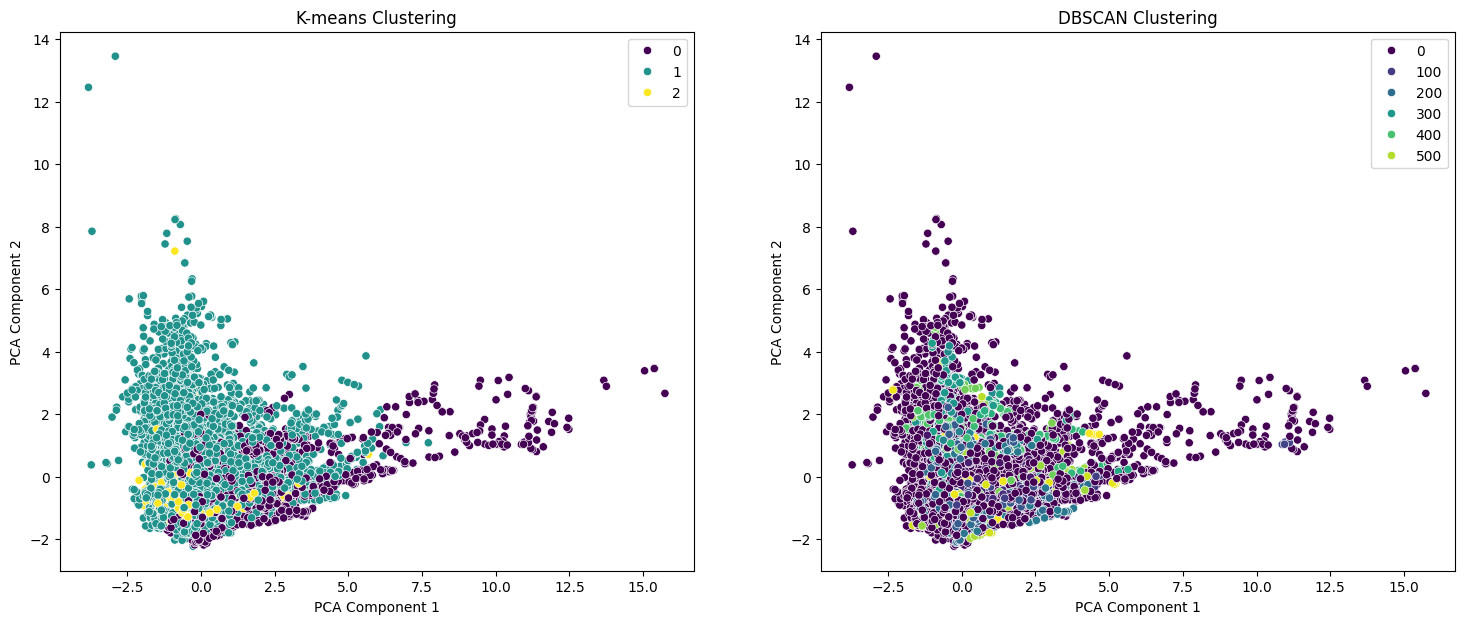

Silhouette Score for K-means: 0.128720284156702
Silhouette Score for DBSCAN: -0.31871865854931214


In [30]:
#DBSCAN
# DBSCAN Clustering
# Tune DBSCAN parameters (eps and min_samples) based on the data
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Visualize the clustering results with PCA
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# K-means Clustering Visualization
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_kmeans, palette='viridis', ax=ax1)
ax1.set_title('K-means Clustering')
ax1.set_xlabel('PCA Component 1')
ax1.set_ylabel('PCA Component 2')

# DBSCAN Clustering Visualization
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_dbscan, palette='viridis', ax=ax2)
ax2.set_title('DBSCAN Clustering')
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')

plt.show()

# Calculate and print silhouette scores for the clustering results
silhouette_kmeans = silhouette_score(X_scaled, clusters_kmeans)
silhouette_dbscan = silhouette_score(X_scaled, clusters_dbscan) if len(set(clusters_dbscan)) > 1 else -1

print(f'Silhouette Score for K-means: {silhouette_kmeans}')
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')